# 03. 시각화 (Visualization)

계산된 성격 척도 점수의 상관관계와 분포를 시각화합니다.

## 학습 목표
- 7개 척도 간 상관행렬 히트맵 생성
- Big Five, Ideology, Honesty-Humility 점수 분포 확인
- 주요 상관관계 파악


In [1]:
# 필요한 라이브러리 설치 (처음 한 번만 실행)
%pip install pandas numpy matplotlib seaborn -q



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 한글 폰트 설정 (필요시)
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")
sns.set_palette("husl")

# 상위 폴더로 이동해서 데이터 접근
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
print(f'작업 폴더: {os.getcwd()}')


작업 폴더: /Users/serinoh/serin-oh/safa


## 1. 데이터 로드


In [3]:
# 전처리된 점수 데이터 로드
scores = pd.read_csv('data/processed/sapa_scores.csv')
print(f'점수 데이터 크기: {scores.shape}')
print(f'\n척도 목록:')
for col in scores.columns:
    if col != 'RID':
        n_valid = scores[col].notna().sum()
        print(f'  - {col}: {n_valid:,}명')


점수 데이터 크기: (23647, 13)

척도 목록:
  - NEO_Openness: 23,399명
  - NEO_Conscientiousness: 23,417명
  - NEO_Extraversion: 23,357명
  - NEO_Agreeableness: 23,437명
  - NEO_Neuroticism: 23,371명
  - MPQ_Traditionalism: 13,478명
  - NEO_Liberalism: 13,117명
  - Ideology: 11,825명
  - NEO_Morality: 19,966명
  - NEO_Modesty: 14,847명
  - HEXACO_H: 23,640명
  - Honesty_Humility: 12,828명


In [4]:
# 시각화할 척도 선택 (7개)
scale_cols = [
    'NEO_Openness',
    'NEO_Conscientiousness',
    'NEO_Extraversion',
    'NEO_Agreeableness',
    'NEO_Neuroticism',
    'Ideology',
    'Honesty_Humility'
]

# 유효한 데이터만 추출
scores_viz = scores[scale_cols].copy()
print(f'시각화 대상 척도: {len(scale_cols)}개')
print(f'데이터 크기: {scores_viz.shape}')


시각화 대상 척도: 7개
데이터 크기: (23647, 7)


## 2. 상관행렬 계산 및 시각화

7개 척도 간 상관관계를 계산하고 히트맵으로 시각화합니다.


In [5]:
# 상관행렬 계산 (pairwise deletion)
corr_matrix = scores_viz.corr()

print('=== 상관행렬 ===')
print(corr_matrix.round(3))


=== 상관행렬 ===
                       NEO_Openness  NEO_Conscientiousness  NEO_Extraversion  \
NEO_Openness                  1.000                  0.008             0.099   
NEO_Conscientiousness         0.008                  1.000             0.121   
NEO_Extraversion              0.099                  0.121             1.000   
NEO_Agreeableness             0.071                  0.194             0.067   
NEO_Neuroticism              -0.046                 -0.232            -0.238   
Ideology                     -0.573                  0.174             0.056   
Honesty_Humility              0.030                  0.266            -0.038   

                       NEO_Agreeableness  NEO_Neuroticism  Ideology  \
NEO_Openness                       0.071           -0.046    -0.573   
NEO_Conscientiousness              0.194           -0.232     0.174   
NEO_Extraversion                   0.067           -0.238     0.056   
NEO_Agreeableness                  1.000           -0.085     

In [6]:
# Pairwise N 계산 (각 쌍별 유효한 관측치 수)
def pairwise_n(df):
    """각 변수 쌍별 유효한 관측치 수 계산"""
    n_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=int)
    for i, col1 in enumerate(df.columns):
        for j, col2 in enumerate(df.columns):
            if i <= j:
                n = df[[col1, col2]].dropna().shape[0]
                n_matrix.loc[col1, col2] = n
                n_matrix.loc[col2, col1] = n
    return n_matrix

pairwise_n_matrix = pairwise_n(scores_viz)
print('\n=== Pairwise N (각 쌍별 유효 관측치 수) ===')
print(pairwise_n_matrix)



=== Pairwise N (각 쌍별 유효 관측치 수) ===
                       NEO_Openness  NEO_Conscientiousness  NEO_Extraversion  \
NEO_Openness                23399.0                23214.0           23145.0   
NEO_Conscientiousness       23214.0                23417.0           23168.0   
NEO_Extraversion            23145.0                23168.0           23357.0   
NEO_Agreeableness           23220.0                23234.0           23180.0   
NEO_Neuroticism             23167.0                23185.0           23119.0   
Ideology                    11825.0                11788.0           11753.0   
Honesty_Humility            12790.0                12799.0           12772.0   

                       NEO_Agreeableness  NEO_Neuroticism  Ideology  \
NEO_Openness                     23220.0          23167.0   11825.0   
NEO_Conscientiousness            23234.0          23185.0   11788.0   
NEO_Extraversion                 23180.0          23119.0   11753.0   
NEO_Agreeableness                23437.

저장 완료: reports/figures/correlation_matrix.png


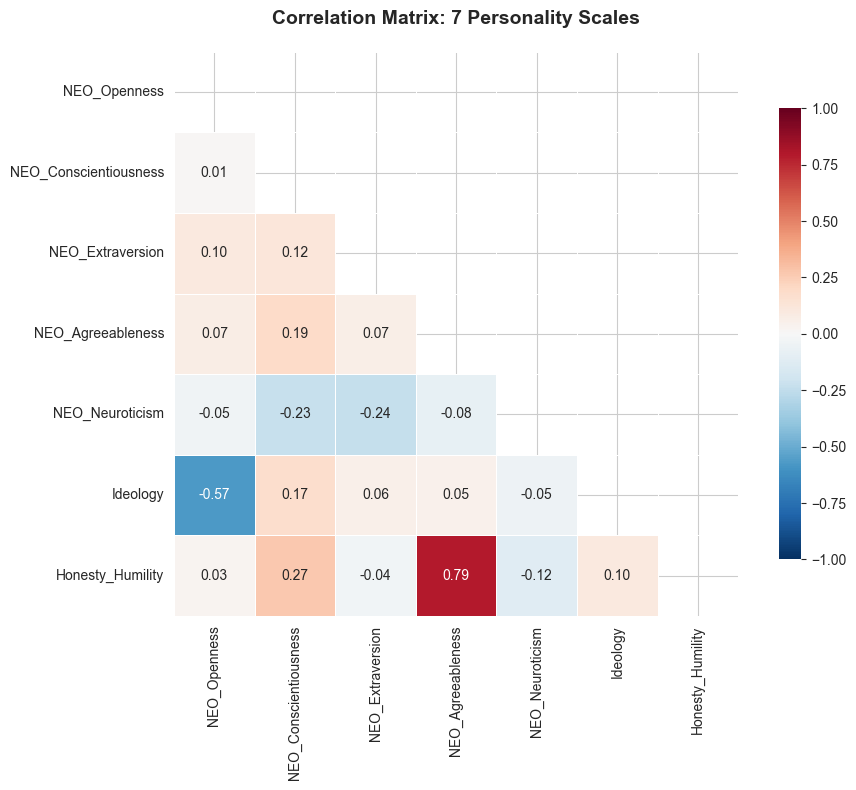

In [7]:
# 상관행렬 히트맵 생성
fig, ax = plt.subplots(figsize=(10, 8))

# 히트맵 그리기
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # 상삼각형 마스크
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            ax=ax)

plt.title('Correlation Matrix: 7 Personality Scales', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

# 저장
os.makedirs('reports/figures', exist_ok=True)
plt.savefig('reports/figures/correlation_matrix.png', dpi=300, bbox_inches='tight')
print('저장 완료: reports/figures/correlation_matrix.png')
plt.show()


In [8]:
# 주요 상관관계 추출 (절댓값 0.3 이상)
print('=== 주요 상관관계 (|r| >= 0.3) ===')
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.loc[col1, col2]
        n_val = pairwise_n_matrix.loc[col1, col2]
        if abs(corr_val) >= 0.3:
            corr_pairs.append({
                '척도1': col1,
                '척도2': col2,
                '상관계수': corr_val,
                'N': n_val
            })

if corr_pairs:
    corr_df = pd.DataFrame(corr_pairs)
    corr_df = corr_df.sort_values('상관계수', key=abs, ascending=False)
    print(corr_df.to_string(index=False))
else:
    print('|r| >= 0.3인 상관관계가 없습니다.')


=== 주요 상관관계 (|r| >= 0.3) ===
              척도1              척도2      상관계수       N
NEO_Agreeableness Honesty_Humility  0.791307 12828.0
     NEO_Openness         Ideology -0.572970 11825.0


## 3. Big Five 점수 분포 시각화

Big Five 성격 요인 점수의 분포를 히스토그램으로 확인합니다.


저장 완료: reports/figures/big_five_distributions.png


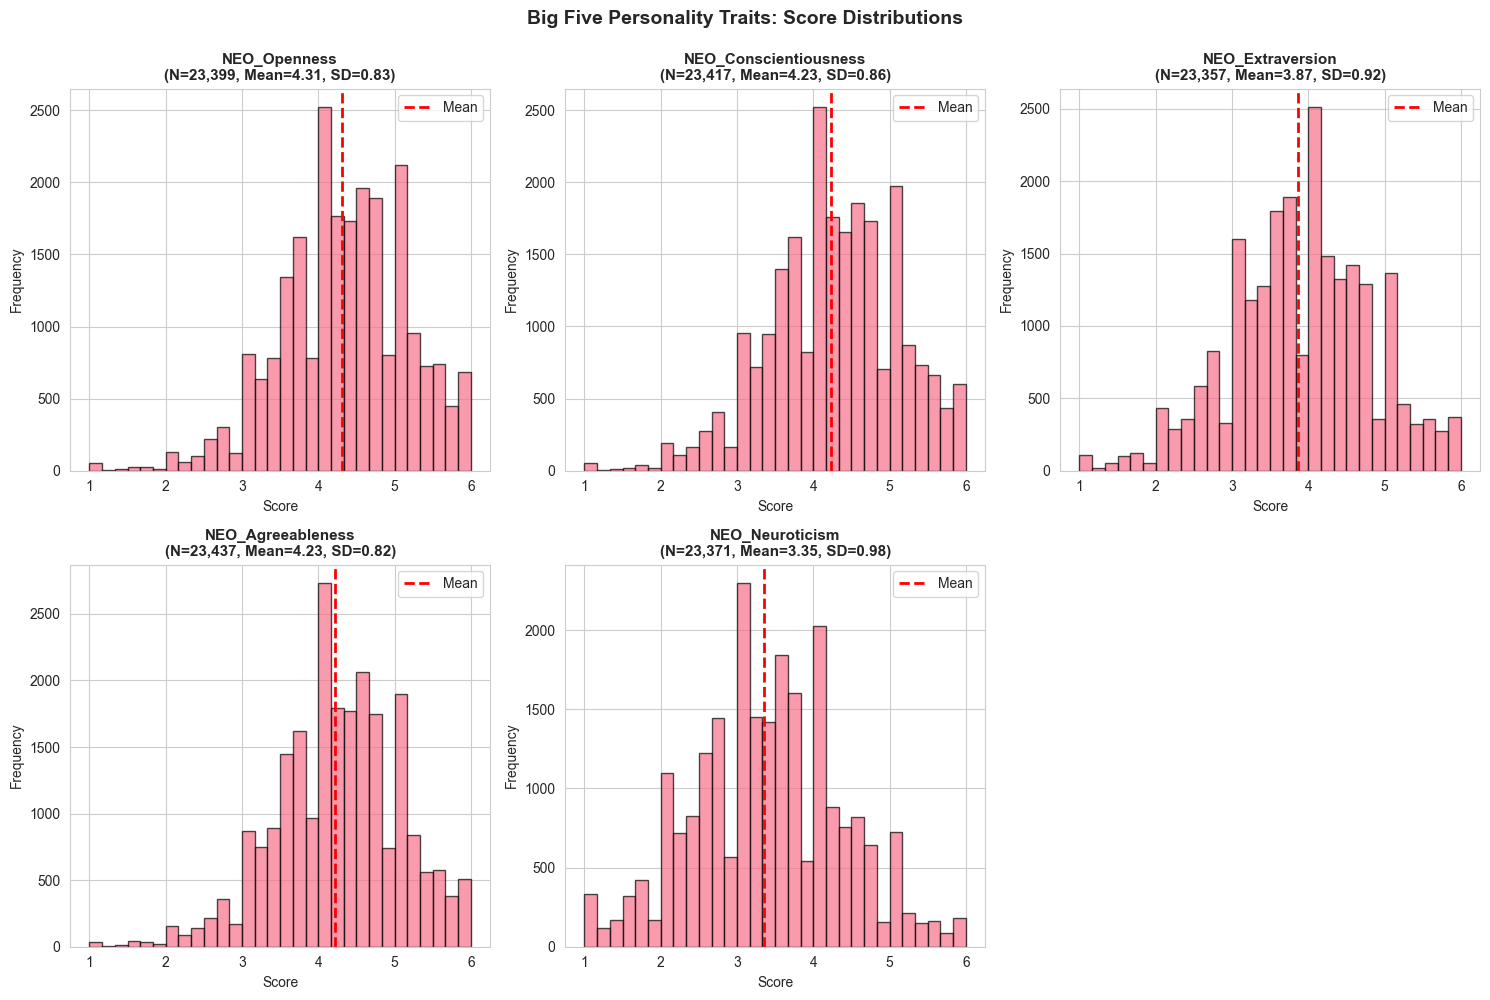

In [9]:
# Big Five 척도
big_five_cols = [
    'NEO_Openness',
    'NEO_Conscientiousness',
    'NEO_Extraversion',
    'NEO_Agreeableness',
    'NEO_Neuroticism'
]

# Big Five 히스토그램
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(big_five_cols):
    data = scores_viz[col].dropna()
    axes[idx].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\n(N={len(data):,}, Mean={data.mean():.2f}, SD={data.std():.2f})', 
                        fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Score', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[idx].legend()

# 마지막 subplot 제거
fig.delaxes(axes[5])

plt.suptitle('Big Five Personality Traits: Score Distributions', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()

# 저장
plt.savefig('reports/figures/big_five_distributions.png', dpi=300, bbox_inches='tight')
print('저장 완료: reports/figures/big_five_distributions.png')
plt.show()


## 4. Ideology 및 Honesty-Humility 분포 시각화

Ideology와 Honesty-Humility 점수의 분포를 확인합니다.


저장 완료: reports/figures/ideology_hh_distributions.png


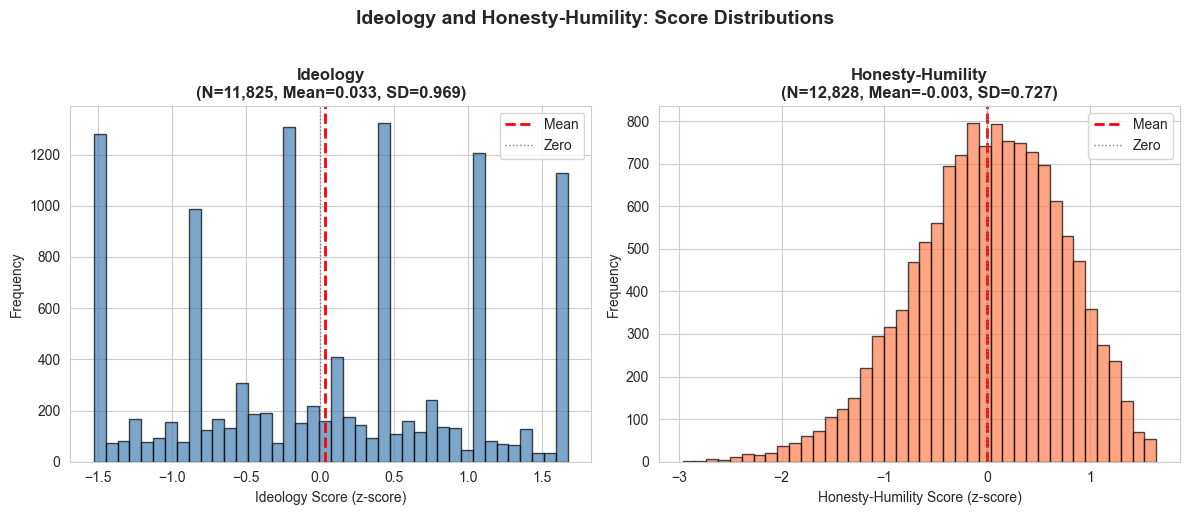

In [10]:
# Ideology와 Honesty-Humility 히스토그램
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ideology
ideology_data = scores_viz['Ideology'].dropna()
axes[0].hist(ideology_data, bins=40, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title(f'Ideology\n(N={len(ideology_data):,}, Mean={ideology_data.mean():.3f}, SD={ideology_data.std():.3f})',
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Ideology Score (z-score)', fontsize=10)
axes[0].set_ylabel('Frequency', fontsize=10)
axes[0].axvline(ideology_data.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(0, color='gray', linestyle=':', linewidth=1, label='Zero')
axes[0].legend()

# Honesty-Humility
hh_data = scores_viz['Honesty_Humility'].dropna()
axes[1].hist(hh_data, bins=40, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title(f'Honesty-Humility\n(N={len(hh_data):,}, Mean={hh_data.mean():.3f}, SD={hh_data.std():.3f})',
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Honesty-Humility Score (z-score)', fontsize=10)
axes[1].set_ylabel('Frequency', fontsize=10)
axes[1].axvline(hh_data.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1].axvline(0, color='gray', linestyle=':', linewidth=1, label='Zero')
axes[1].legend()

plt.suptitle('Ideology and Honesty-Humility: Score Distributions',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

# 저장
plt.savefig('reports/figures/ideology_hh_distributions.png', dpi=300, bbox_inches='tight')
print('저장 완료: reports/figures/ideology_hh_distributions.png')
plt.show()


## 5. 요약 통계

모든 척도의 요약 통계를 확인합니다.


In [11]:
# 요약 통계
summary_stats = pd.DataFrame({
    'N': scores_viz[scale_cols].notna().sum(),
    'Mean': scores_viz[scale_cols].mean(),
    'SD': scores_viz[scale_cols].std(),
    'Min': scores_viz[scale_cols].min(),
    'Max': scores_viz[scale_cols].max(),
    'Median': scores_viz[scale_cols].median(),
    'Skewness': scores_viz[scale_cols].skew()
})

print('=== 척도별 요약 통계 ===')
print(summary_stats.round(3))


=== 척도별 요약 통계 ===
                           N   Mean     SD    Min    Max  Median  Skewness
NEO_Openness           23399  4.308  0.827  1.000  6.000   4.333    -0.363
NEO_Conscientiousness  23417  4.233  0.855  1.000  6.000   4.250    -0.330
NEO_Extraversion       23357  3.868  0.922  1.000  6.000   3.889    -0.180
NEO_Agreeableness      23437  4.225  0.816  1.000  6.000   4.250    -0.329
NEO_Neuroticism        23371  3.355  0.979  1.000  6.000   3.333     0.042
Ideology               11825  0.033  0.969 -1.527  1.675   0.058     0.033
Honesty_Humility       12828 -0.003  0.727 -2.962  1.642   0.040    -0.385


## 6. 생성된 파일 목록

시각화 결과 파일을 확인합니다.


In [12]:
# 생성된 파일 확인
figures_dir = 'reports/figures'
if os.path.exists(figures_dir):
    files = [f for f in os.listdir(figures_dir) if f.endswith('.png')]
    if files:
        print('=== 생성된 시각화 파일 ===')
        for f in sorted(files):
            file_path = os.path.join(figures_dir, f)
            file_size = os.path.getsize(file_path) / 1024  # KB
            print(f'  - {f} ({file_size:.1f} KB)')
    else:
        print('아직 생성된 파일이 없습니다.')
else:
    print(f'{figures_dir} 폴더가 없습니다.')


=== 생성된 시각화 파일 ===
  - big_five_distributions.png (309.8 KB)
  - correlation_matrix.png (243.6 KB)
  - ideology_hh_distributions.png (210.4 KB)
